In [10]:
from modules.data import load_dataset , view_random_images , augment_dataset , get_split_stats , create_stratified_split
from modules.preprocessing import preprocess_image
from modules.feature_extraction import extract_features

import numpy as np

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# stored variables are:
# %store -r images
# %store -r labels
# %store -r augmented_images
# %store -r augmented_labels
# %store -r train_images
# %store -r train_labels
# %store -r test_images
# %store -r test_labels
# %store -r val_images
# %store -r val_labels


%store -r

Unable to restore variable 'train_features', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>


DataSet Size : 1821


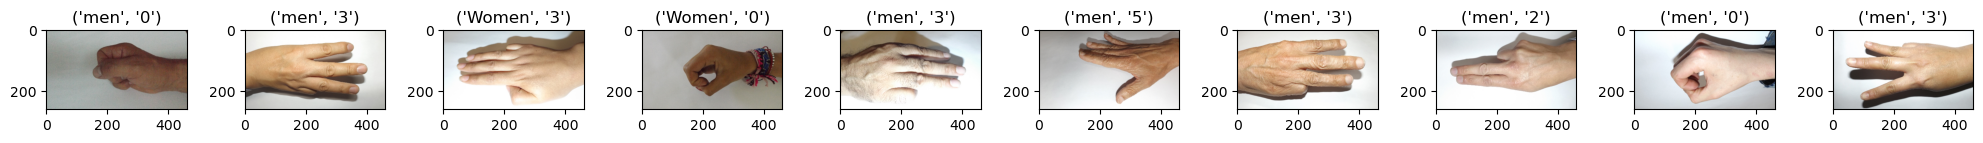

In [11]:
#Load the dataset and view some random images

# images , labels = load_dataset('dataset')
# %store images
# %store labels

print("DataSet Size :" , len(images))
assert len(images) == len(labels) , "Images and labels are not of the same size"
view_random_images(images, labels , num_images=10)

Augmented DataSet Size : 679


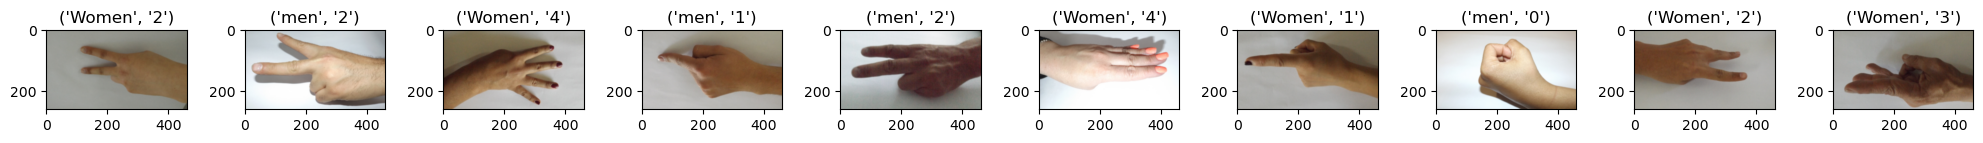

In [12]:
#Augment the dataset and view some random images

# augmented_images , augmented_labels = augment_dataset(images, labels , num_images=679)
# %store augmented_images
# %store augmented_labels

print("Augmented DataSet Size :" , len(augmented_images))
assert len(augmented_images) == len(augmented_labels) , "Images and labels of augmented Dataset are not of the same size"
view_random_images(augmented_images, augmented_labels , num_images=10)

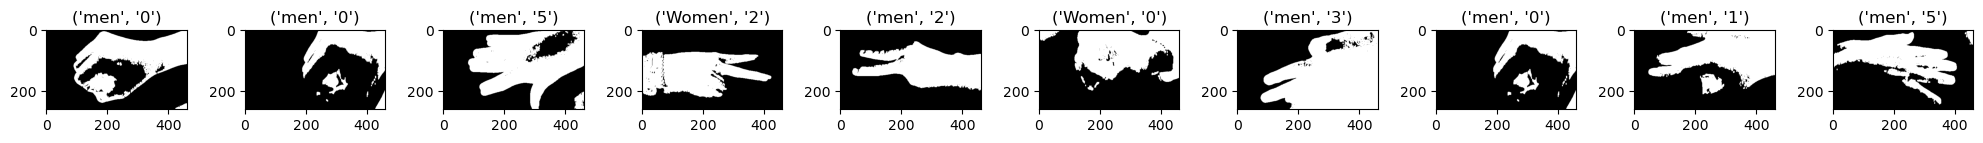

In [13]:
#preprocess the images and store them in place
for i in range(len(images)):
    images[i] = preprocess_image(images[i])
#view some random images
view_random_images(images, labels , num_images=10)

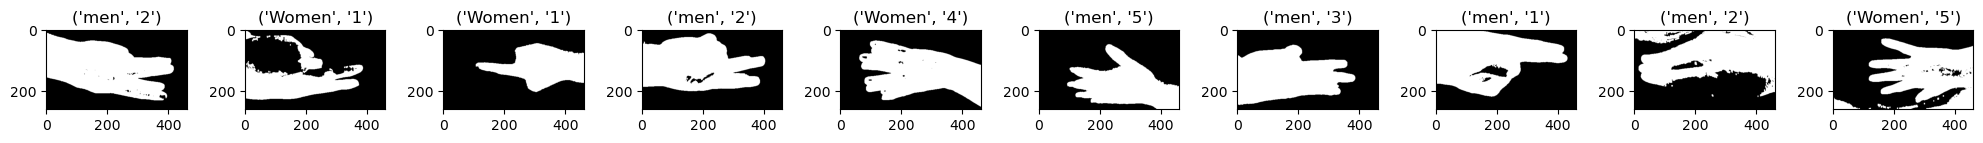

In [14]:
#preprocess the augmented images and store them in place
for i in range(len(augmented_images)):
    augmented_images[i] = preprocess_image(augmented_images[i])

view_random_images(augmented_images, augmented_labels , num_images=10)

In [15]:
# train_images, train_labels, test_images, test_labels, val_images, val_labels = create_stratified_split(images= images , labels= labels , test_size=0.1, val_size=0.1)
# %store train_images
# %store train_labels
# %store test_images
# %store test_labels
# %store val_images
# %store val_labels

print("Train Set Size :" , len(train_images))
print("Test Set Size :" , len(test_images))
print("Val Set Size :" , len(val_images))

Train Set Size : 1469
Test Set Size : 164
Val Set Size : 188


In [16]:
get_split_stats(train_labels, test_labels, val_labels)

+Train Set----+-----+-------+
| class_count | Men | Women |
+-------------+-----+-------+
| 0           | 141 | 96    |
| 1           | 139 | 106   |
| 2           | 128 | 106   |
| 3           | 141 | 108   |
| 4           | 142 | 107   |
| 5           | 143 | 112   |
+-------------+-----+-------+
+Test Set-----+-----+-------+
| class_count | Men | Women |
+-------------+-----+-------+
| 0           | 13  | 8     |
| 1           | 19  | 12    |
| 2           | 23  | 13    |
| 3           | 14  | 11    |
| 4           | 10  | 14    |
| 5           | 18  | 9     |
+-------------+-----+-------+
+Val Set------+-----+-------+
| class_count | Men | Women |
+-------------+-----+-------+
| 0           | 18  | 11    |
| 1           | 17  | 7     |
| 2           | 24  | 14    |
| 3           | 25  | 17    |
| 4           | 16  | 12    |
| 5           | 16  | 11    |
+-------------+-----+-------+


In [17]:
#all augmented images are used for training
train_images.extend(augmented_images)
train_labels.extend(augmented_labels)

In [18]:
print("Train Set Size :" , len(train_images))
assert len(train_images) == len(train_labels) , "Images and labels of train Dataset are not of the same size"

Train Set Size : 2148


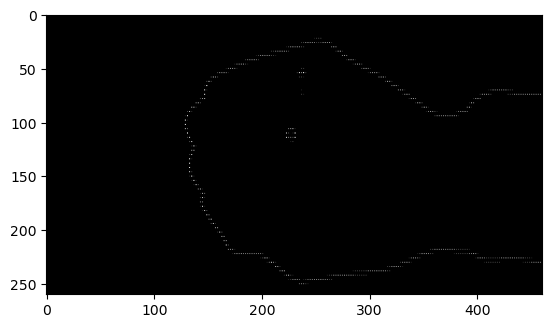

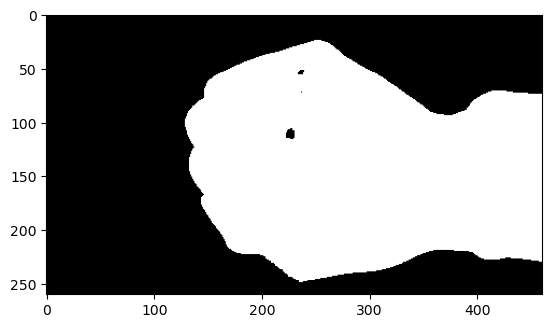

In [19]:
from modules.feature_extraction import visualize_HOG
## here we explore the HOG features of a random image
## and how the HOG features change with different parameters
## the default parameters are the ones we chose 
index = 0
image = train_images[index]
visualize_HOG(image)


In [ ]:
from modules.feature_extraction import extract_features_skimage

# Extract all features from the whole dataset
train_features = np.array([])

for image in train_images:
    features = extract_features_skimage(image)
    if train_features.size == 0:
        train_features = features
    else:
        train_features = np.vstack((train_features, features))

In [ ]:
print(train_features.shape)

(2148, 258552)


In [ ]:
import pickle
# Save the train_features in a pickle file
with open('train_features.pkl', 'wb') as f:
    pickle.dump(train_features, f)

In [ ]:
import pickle 
# load the train_features from the pickle file
with open('train_features.pkl', 'rb') as f:
    train_features = pickle.load(f)


### Try different values of n_components 
- The extracted features should be experimented to choose the best value for n_components. 

In [2]:
from modules.feature_extraction import reduce_features

# Reduce the dimensionality of the features
pca1, train_features_reduced1 = reduce_features(train_features, n_components= 0.95)

In [3]:
# Reduce the dimensionality of the features
pca2, train_features_reduced2 = reduce_features(train_features, n_components= 0.75)

In [4]:
# Reduce the dimensionality of the features
pca3, train_features_reduced3 = reduce_features(train_features, n_components= 0.5)

In [5]:
# Reduce the dimensionality of the features
pca4, train_features_reduced4 = reduce_features(train_features, n_components= 0.35)

In [6]:
# Reduce the dimensionality of the features
pca5, train_features_reduced5 = reduce_features(train_features, n_components= 0.25)

In [7]:
# print all the reduced features shapes
print(train_features_reduced1.shape)
print(train_features_reduced2.shape)
print(train_features_reduced3.shape)
print(train_features_reduced4.shape)
print(train_features_reduced5.shape)

(2148, 1681)
(2148, 909)
(2148, 400)
(2148, 211)
(2148, 120)


In [21]:
#extract features from the test images
test_features = np.array([])
for image in test_images:
    features = extract_features_skimage(image)
    if test_features.size == 0:
        test_features = features
    else:
        test_features = np.hstack((test_features, features))

In [ ]:
from modules.models import svm_model
svm_model(train_features, train_labels, test_images, test_labels)